In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('spotify-2023-1.csv')
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##### Overview of Dataset
###### 1. How many rows and columns does the dataset contain?###### 2. What are the data types of each column? Are there any missing values??

In [52]:
# .shape function is a form of rows and columns, where shape[0] represents the rows and shape[1] represents the columns
print(f"There are a total of {spotify.shape[0]} rows and {spotify.shape[1]} columns in the spotify dataset.")

# Creates a table for the summary of data
summary = pd.DataFrame({
    #It retrieves all the column name and aligns them to the left
    "Column Name": spotify.columns.str.ljust(20),  
    #.dtypes.values gives the data type and extract values to store in the summary table
    "Data Type": spotify.dtypes.values,
    #Count the missing values of each column and stores in the summary table
    "Missing Values": spotify.isnull().sum().values
})
#Prints the word "Summary of Data Types and Missing Values:" for better understanding
print("\nSummary of Data Types and Missing Values:\n")
#to_string converts the summary into string format. This line of code also removes the default numeric index and aligns the data to left for cleaner view
print(summary.to_string(index=False,justify='left'))  

There are a total of 953 rows and 24 columns in the spotify dataset.

Summary of Data Types and Missing Values:

Column Name          Data Type  Missing Values
track_name           object     0             
artist(s)_name       object     0             
artist_count          int64     0             
released_year         int64     0             
released_month        int64     0             
released_day          int64     0             
in_spotify_playlists  int64     0             
in_spotify_charts     int64     0             
streams              object     0             
in_apple_playlists    int64     0             
in_apple_charts       int64     0             
in_deezer_playlists  object     0             
in_deezer_charts      int64     0             
in_shazam_charts     object    50             
bpm                   int64     0             
key                  object    95             
mode                 object     0             
danceability_%        int64     0        

##### Insight:
###### The generated output presents a table listing each column's name, data type, and the count of missing values, if any. Additionally, it displays the total number of rows and columns in the Spotify dataset, which contains 983 rows and 24 columns. The columns in_shazam_charts and key have 50 and 95 missing values, respectively. It also suggests that the dominant data type that is present in the dataset is an integer or number.

##### Basic Descriptive Statistics
###### 1. What are the mean, median, and standard deviation of the streams column?
###### 2. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Streams Descriptive Statistics:
Mean: 514,137,425
Median: 290,530,915
Standard Deviation: 566,856,949


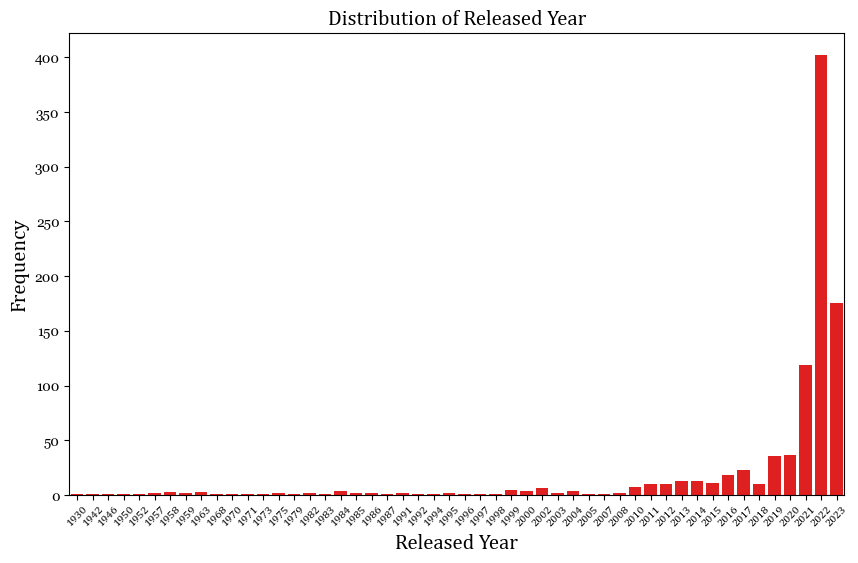

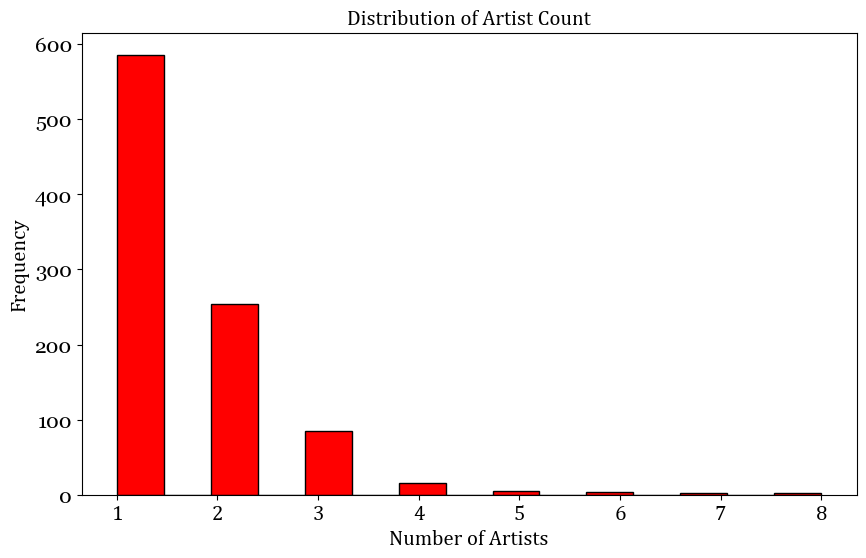

In [129]:
# To avoid errors and miscalculations, this code includes a parameter that drops rows with missing values. 
# However, as seen in the overview of the dataset, the streams column does not have any missing values. 
# This function serves as a check for any discrepancies.
spotify = spotify.dropna(subset=['streams'])

# Calculating mean, median, and standard deviation (using the built-in functions) of the streams column
spotifystreams_mean = spotify['streams'].mean()
spotifystreams_median = spotify['streams'].median()
spotifystreams_std = spotify['streams'].std()

# Displaying the mean, median, and standard deviation result as a whole number 
print("Streams Descriptive Statistics:")
print(f"Mean: {spotifystreams_mean:,.0f}")
print(f"Median: {spotifystreams_median:,.0f}")
print(f"Standard Deviation: {spotifystreams_std:,.0f}")

# Distribution for released year
#This determines the size of the graph
plt.figure(figsize=(10, 6))
#Count the frequency for each year and setting the bar color to red
sns.countplot(data=spotify, x='released_year', color='red')
plt.title('Distribution of Released Year',fontsize=15,fontfamily='cambria')    #Setting the title of the graph as well as its fontsize and fontstyle
plt.xlabel('Released Year',fontsize=15,fontfamily='cambria')                   #Setting the label of the x-axis as well as its fontsize and fontstyle
plt.ylabel('Frequency',fontsize=15,fontfamily='cambria')                       #Setting the label of the y-axis as well as its fontsize and fontstyle
plt.xticks(rotation=45,fontsize=8,fontfamily='cambria')                        #Setting the label of the data on the x-axis, as well as its angle, font size, and font style.
plt.yticks(fontsize=10,fontfamily='georgia')                                   #Setting the label of the data on the x-axis, as well as its font size and font style.
plt.show()                                                                     #Displays the chart

# Distribution for artist count
#This determines the size of the graph
plt.figure(figsize=(10, 6))
#A histogram graph is being utilized. It also check for any discrepancies
plt.hist(spotify['artist_count'].dropna(),bins=15,color='red',edgecolor='black')
plt.title('Distribution of Artist Count',fontsize=15,fontfamily='cambria')           #Setting the title of the graph as well as its fontsize and fontstyle
plt.xlabel('Number of Artists',fontsize=15,fontfamily='cambria')                     #Setting the label of the x-axis as well as its fontsize and fontstyle
plt.ylabel('Frequency',fontsize=15,fontfamily='cambria')                             #Setting the label of the y-axis as well as its fontsize and fontstyle
plt.xticks(fontsize=15,fontfamily='cambria')                                         #Setting the label of the data on the x-axis, as well as its font size and font style.
plt.yticks(fontsize=15,fontfamily='georgia')                                         #Setting the label of the data on the y-axis, as well as its font size and font style.
plt.show()                                                                           #Displays the chart


##### Insight:
###### bla bla bla

#####  Top Performers
###### 1. Which track has the highest number of streams? Display the top 5 most streamed tracks?
###### 2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

##### Temporal Trends
###### 1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
###### 2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

##### Genre and Music Characteristics
###### 1. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
###### 2. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

#####  Platform Popularity
###### 1. How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?


##### Advanced Analysis
###### 1. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
###### 2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.